<a href="https://colab.research.google.com/github/rhwy12/AI_TeamProject/blob/main/AI3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 (FinanceDataReader)

FinanceDataReader는 주가 데이터를 편리하게 가져올 수 있는 파이썬 패키지입니다.

In [1]:
pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 1.6 MB/s 


In [23]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

고유 주식코드를 입력하여 주가데이터를 가져와서 예측해 보도록 하겠습니다.

In [24]:
STOCK_CODE = '217620'

In [25]:
stock = fdr.DataReader(STOCK_CODE)

매우 편리하게 삼성전자 주가 데이터를 DataFrame형식으로 받아옵니다.

기본 오름차순 정렬이 된 데이터임을 알 수 있습니다.

컬럼 설명

Open: 시가

High: 고가

Low: 저가

Close: 종가

Volume: 거래량

Change: 대비

In [26]:
stock.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-06-03,1270,1365,1270,1345,237276,0.050781
2022-06-07,1330,1470,1330,1420,721786,0.055762
2022-06-08,1405,1535,1385,1520,766448,0.070423
2022-06-09,1550,1620,1465,1465,666966,-0.036184
2022-06-10,1505,1505,1435,1470,122844,0.003413


In [27]:
stock.index

DatetimeIndex(['2015-06-10', '2015-06-11', '2015-06-12', '2015-06-15',
               '2015-06-16', '2015-06-17', '2015-06-18', '2015-06-19',
               '2015-06-22', '2015-06-23',
               ...
               '2022-05-26', '2022-05-27', '2022-05-30', '2022-05-31',
               '2022-06-02', '2022-06-03', '2022-06-07', '2022-06-08',
               '2022-06-09', '2022-06-10'],
              dtype='datetime64[ns]', name='Date', length=1723, freq=None)

## 시각화

Text(0, 0.5, 'price')

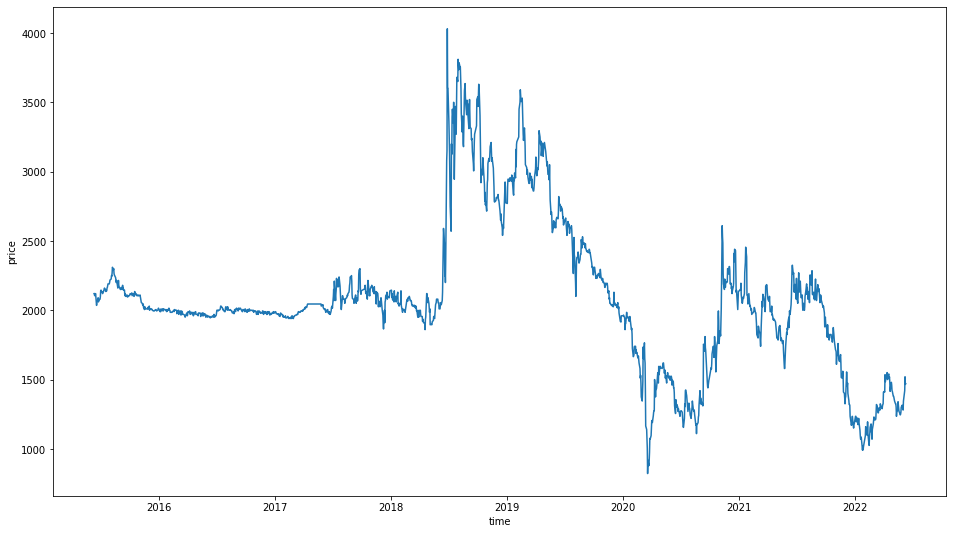

In [28]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

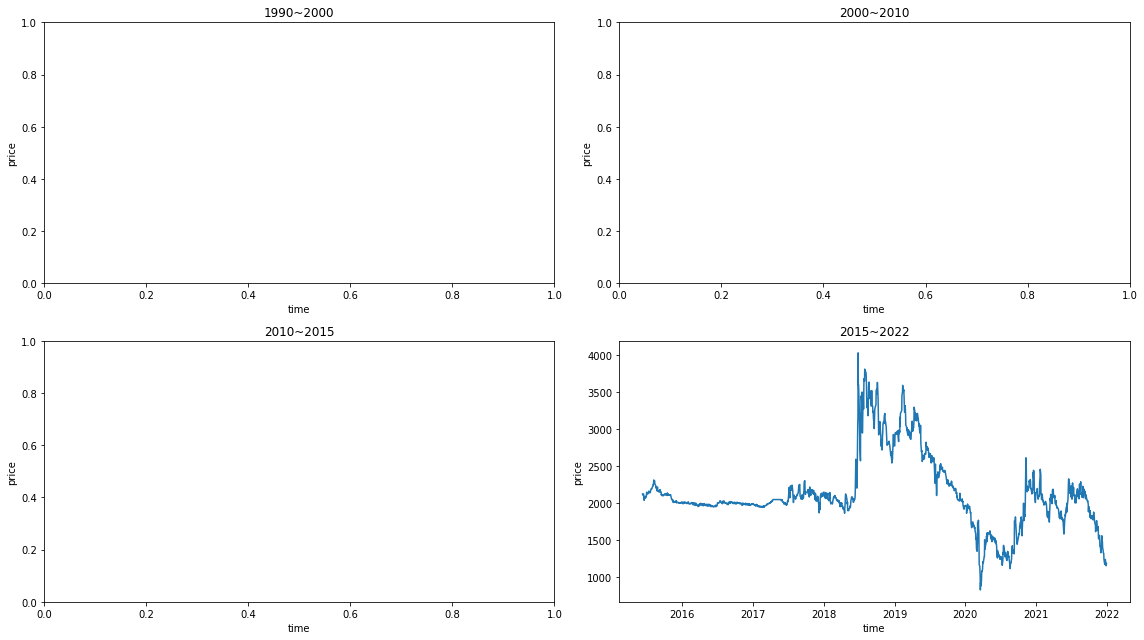

In [29]:
time_steps = [['1990', '2000'], 
              ['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2022']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

## 데이터 전처리

주가 데이터에 대하여 딥러닝 모델이 더 잘 학습할 수 있도록 정규화(Normalization)를 해주도록 하겠습니다.

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

# 스케일 후 columns
scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[0.54145729, 0.49101124, 0.55437666, 0.40461347, 0.0720434 ],
       [0.53643216, 0.48089888, 0.5596817 , 0.40305486, 0.00852063],
       [0.52638191, 0.47752809, 0.55437666, 0.39993766, 0.00708287],
       ...,
       [0.35301508, 0.34494382, 0.36737401, 0.21758105, 0.02131584],
       [0.38944724, 0.36404494, 0.38859416, 0.20043641, 0.01854912],
       [0.3781407 , 0.33820225, 0.3806366 , 0.20199501, 0.00341644]])

스케일이 완료된 column으로 새로운 데이터프레임을 생성합니다.

시간 순으로 정렬되어 있으며, datetime index는 제외했습니다.

6,000개의 row, 5개 column으로 이루어진 데이터셋이 DataFrame으로 정리되었습니다.

In [31]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)


In [33]:
x_train.shape, y_train.shape

((1378, 4), (1378,))

In [34]:
x_test.shape, y_test.shape

((345, 4), (345,))

In [35]:
x_train

,Open,High,Low,Volume
0,0.541457,0.491011,0.554377,0.072043
1,0.536432,0.480899,0.559682,0.008521
2,0.526382,0.477528,0.554377,0.007083
3,0.527638,0.477528,0.555703,0.004866
4,0.530151,0.475281,0.549072,0.009956
...,...,...,...,...
1373,0.537688,0.480899,0.542440,0.007426
1374,0.520101,0.471910,0.530504,0.003314
1375,0.516332,0.470787,0.531830,0.004201
1376,0.523869,0.477528,0.551724,0.002498


## TensroFlow Dataset을 활용한 시퀀스 데이터셋 구성

In [36]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

WINDOW_SIZE=20
BATCH_SIZE=32

# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


## 모델

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
     43/Unknown - 3s 12ms/step - loss: 0.0416 - mse: 0.0833
Epoch 1: val_loss improved from inf to 0.00306, saving model to tmp/ckeckpointer.ckpt
43/43 [==============================] - 4s 29ms/step - loss: 0.0416 - mse: 0.0833 - val_loss: 0.0031 - val_mse: 0.0061
Epoch 2/50
40/43 [==========================>...] - ETA: 0s - loss: 0.0017 - mse: 0.0034
Epoch 2: val_loss improved from 0.00306 to 0.00080, saving model to tmp/ckeckpointer.ckpt
43/43 [==============================] - 1s 17ms/step - loss: 0.0016 - mse: 0.0033 - val_loss: 8.0380e-04 - val_mse: 0.0016
Epoch 3/50
43/43 [==============================] - ETA: 0s - loss: 8.5976e-04 - mse: 0.0017
Epoch 3: val_loss improved from 0.00080 to 0.00038, saving model to tmp/ckeckpointer.ckpt
43/43 [==============================] - 1s 17ms/step - loss: 8.5976e-04 - mse: 0.0017 - val_loss: 3.8023e-04 - val_mse: 7.6046e-04
Epoch 4/50
43/43 [==============================] - ETA: 0s - loss: 6.9883e-04 - mse: 0.0014
Epoch 4: val

저장한 ModelCheckpoint 를 로드합니다.

In [38]:
model.load_weights(filename)

test_data를 활용하여 예측을 진행합니다.

In [39]:
pred = model.predict(test_data)
pred.shape

(325, 1)

## 예측 데이터 시각화

아래 시각화 코드중 y_test 데이터에 **[20:]**으로 슬라이싱을 한 이유는

예측 데이터에서 20일치의 데이터로 21일치를 예측해야하기 때문에 test_data로 예측 시 *앞의 20일은 예측하지 않습니다.*

따라서, 20번 째 index와 비교하면 더욱 정확합니다.

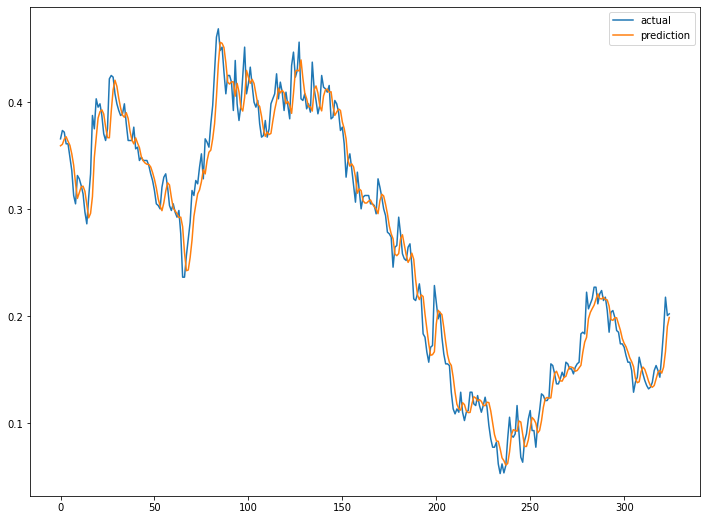

In [40]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [41]:
print("내일 주식의 주가는? :", stock.Close[-1] * pred[-1] / scaled[:, 3][-1])

내일 주식의 주가는? : [1445.3705]
